In [108]:
%pylab inline
import pandas as pd

rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False

Populating the interactive namespace from numpy and matplotlib


In [109]:
sample_info = pd.read_csv('BC_sample_info.csv', index_col=0)

df = pd.read_table('data/Layer2_BC_count_matrix-1.tsv', index_col=0)
df = df.loc[sample_info.index]
df = df.T[df.sum(0) >= 3].T  # Filter practically unobserved genes

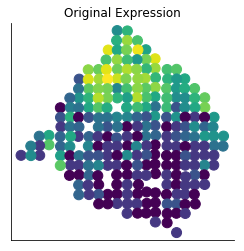

In [184]:
figsize(4, 4)
plt.scatter(sample_info.x, -sample_info.y, c=np.log1p(df['COL3A1']), s=100, rasterized=True);
plt.axis('equal');
plt.title('Original Expression');
plt.xticks([])
plt.yticks([]);
plt.savefig('bc-unshuff-example.pdf');

In [140]:
sample_info_shuffle = sample_info.copy()

In [141]:
tmp = sample_info.index.values.copy()
np.random.shuffle(tmp)
sample_info_shuffle['x'] = sample_info['x'][tmp].values
sample_info_shuffle['y'] = sample_info['y'][tmp].values

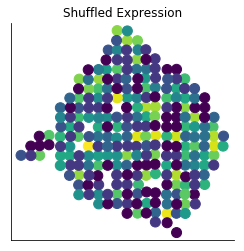

In [183]:
plt.scatter(sample_info_shuffle.x, -sample_info_shuffle.y, c=np.log1p(df['COL3A1']), s=100, rasterized=True);
plt.axis('equal');
plt.title('Shuffled Expression');
plt.xticks([])
plt.yticks([]);
plt.savefig('bc-shuff-example.pdf');

In [143]:
import NaiveDE

In [144]:
dfm = NaiveDE.stabilize(df.T).T
res = NaiveDE.regress_out(sample_info_shuffle, dfm.T, 'np.log(total_counts)').T

In [145]:
import SpatialDE

In [146]:
X = sample_info_shuffle[['x', 'y']]

In [147]:
shuffle_results = SpatialDE.run(X, res)

INFO:root:Performing DE test
INFO:root:Pre-calculating USU^T = K's ...
INFO:root:Done: 0.08s
INFO:root:Fitting gene models
INFO:root:Model 1 of 10
INFO:root:Model 2 of 10                                
INFO:root:Model 3 of 10                                
INFO:root:Model 4 of 10                                
INFO:root:Model 5 of 10                               
INFO:root:Model 6 of 10                                
INFO:root:Model 7 of 10                               
INFO:root:Model 8 of 10                               
INFO:root:Model 9 of 10                               
INFO:root:Model 10 of 10                               


In [148]:
shuffle_results.query('qval < 0.05').shape

(4, 17)

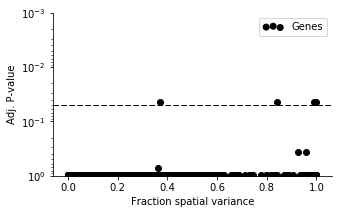

In [181]:
figsize(5, 3)

plt.yscale('log')
plt.scatter(shuffle_results.fraction_spatial_variance, shuffle_results.qval, c='k', label='Genes', rasterized=True);
plt.ylim(1e-3, 1);
plt.gca().invert_yaxis();
plt.axhline(0.05, c='k', ls='--', lw=1);
plt.xlabel('Fraction spatial variance')
plt.ylabel('Adj. P-value');
plt.legend(scatterpoints=3);
plt.savefig('shuffled_BC_FSV_qval.pdf');

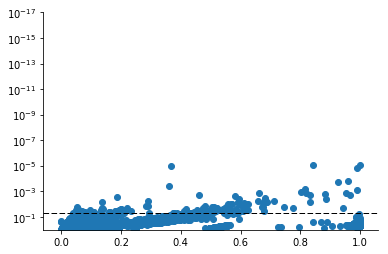

In [150]:
plt.yscale('log')
plt.scatter(shuffle_results.fraction_spatial_variance, shuffle_results.pval);
plt.ylim(1e-17, 1);
plt.gca().invert_yaxis();
plt.axhline(0.05, c='k', ls='--', lw=1);

In [151]:
shuffle_results.sort_values('pval').head(10)

,Gower,M,g,l,max_delta,max_ll,max_mu_hat,max_s2_t_hat,model,n,time,BIC,max_ll_null,LLR,fraction_spatial_variance,pval,qval
9756,0.978164,4,ETV3L,1.087806,0.000046,134.915735,-1.089212,0.301291,SE,250,0.000691,-247.745627,115.073984,19.841751,0.999953,0.000008,0.044719
2695,0.994366,4,SLC4A3,0.641736,0.186039,-12.185256,-1.476308,0.925272,SE,250,0.000890,46.456355,-31.895853,19.710598,0.842394,0.000009,0.044719
10970,0.936002,4,CCNE1,1.843940,1.606350,-14.022307,-1.699478,0.204751,SE,250,0.000553,50.130457,-33.437109,19.414803,0.368164,0.000011,0.044719
3307,0.994366,4,H2AFB3,0.641736,0.011057,122.131613,-1.304196,0.754101,SE,250,0.000425,-222.177383,103.250707,18.880906,0.989003,0.000014,0.044719
12200,0.834688,4,TEKT5,3.125663,0.036848,117.789048,-1.122461,0.372262,SE,250,0.000630,-213.492252,103.573860,14.215188,0.957721,0.000163,0.365719
3011,0.994366,4,SLC37A2,0.641736,0.078404,-14.359716,-1.360230,0.839024,SE,250,0.001090,50.805276,-28.488804,14.129088,0.926915,0.000171,0.365719
8497,0.978164,4,CEACAM5,1.087806,1.726456,54.651187,-1.505085,0.303327,SE,250,0.000720,-87.216529,42.106247,12.544940,0.361664,0.000397,0.729634
3470,0.994366,4,RGS17,0.641736,0.225543,112.278745,-1.332540,0.714112,SE,250,0.000935,-202.471647,100.740625,11.538120,0.815115,0.000682,0.981888
10716,0.936002,4,SMYD1,1.843940,0.010893,126.122450,-1.173761,0.464054,SE,250,0.000892,-230.159057,114.939716,11.182735,0.988496,0.000826,0.981888
3483,0.994366,4,LRRC4C,0.641736,0.247002,110.673308,-1.292139,0.666908,SE,250,0.000905,-199.260772,100.197353,10.475955,0.801024,0.001209,0.981888


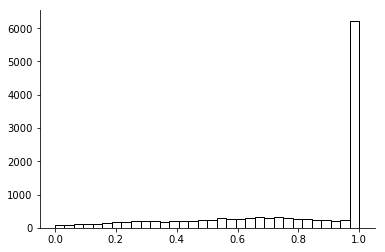

In [152]:
shuffle_results.pval.hist(bins=32, fc='w', ec='k', grid=False);

In [153]:
from scipy import stats

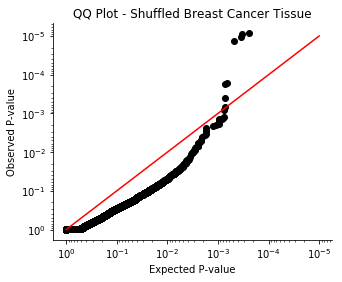

In [170]:
figsize(5, 4)

chi2_samples = pd.Series(stats.chi2.rvs(df=1, size=shuffle_results.LLR.shape[0]))
pval_samples = 1 - stats.chi2.cdf(chi2_samples.sort_values(), df=1)
pval_observed = 1 - stats.chi2.cdf(shuffle_results.LLR.sort_values(), df=1)

plt.loglog()
plt.scatter(pval_samples, pval_observed, marker='o', c='k', rasterized=True);
plt.plot([1e-5, 1], [1e-5, 1], c='r');

plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

plt.xlabel('Expected P-value')
plt.ylabel('Observed P-value');

plt.title('QQ Plot - Shuffled Breast Cancer Tissue');
plt.savefig('shuffled_bc_qq_plot.pdf');